In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/gemstone.csv')

In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df = df.drop(columns='id',axis=1)

In [9]:
num_columns = list(df.columns[df.dtypes!='object'])
cat_columns = list(df.columns[df.dtypes=='object'])

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [12]:
df[cat_columns].describe().T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


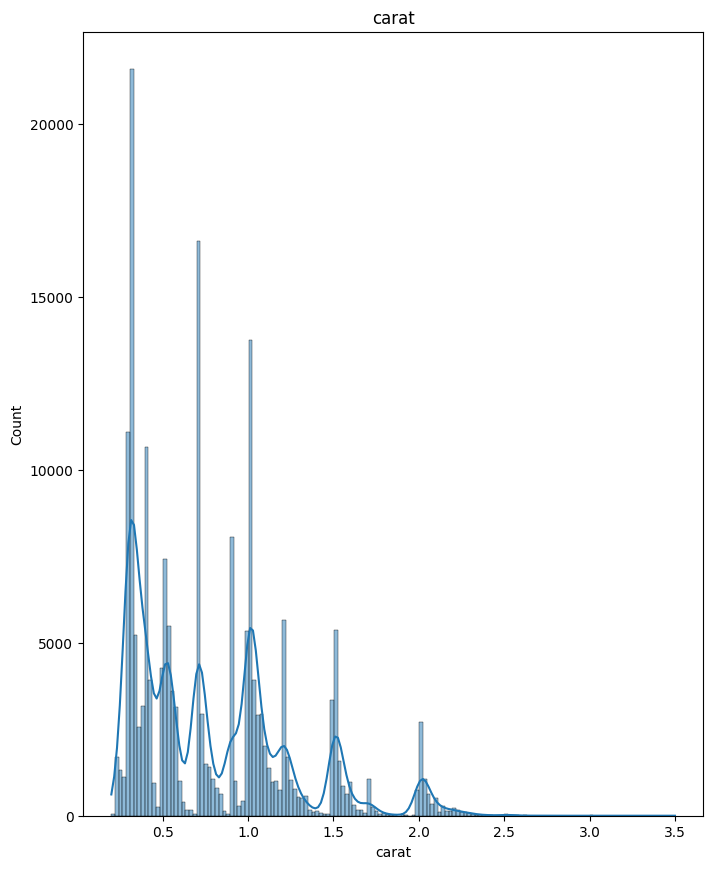

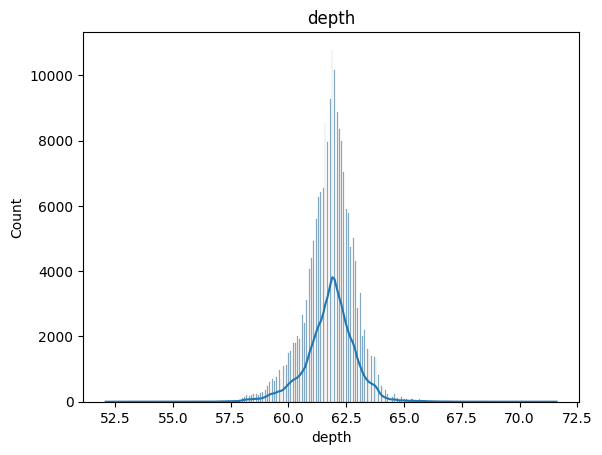

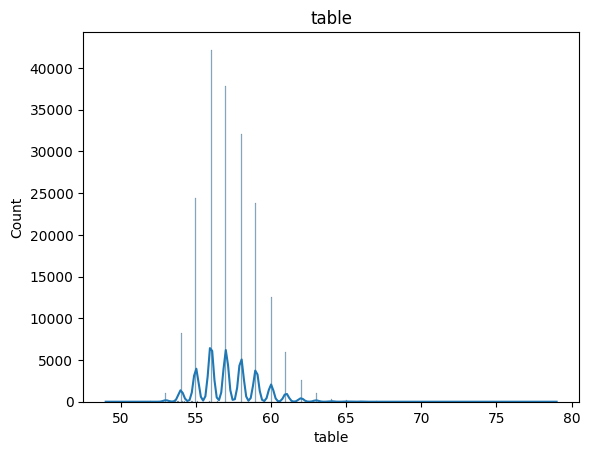

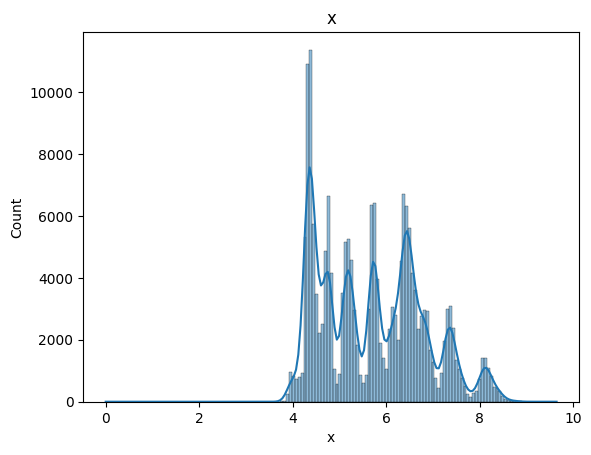

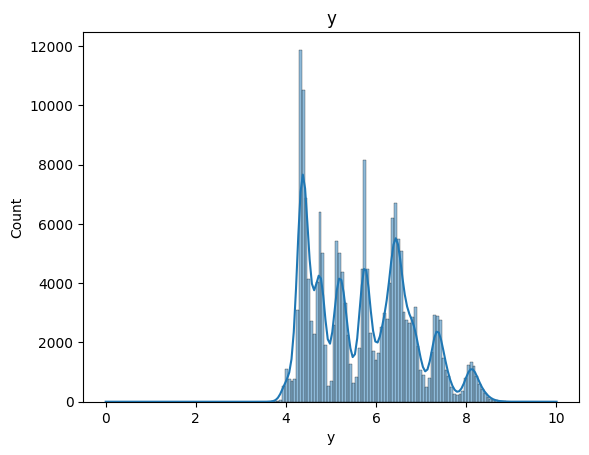

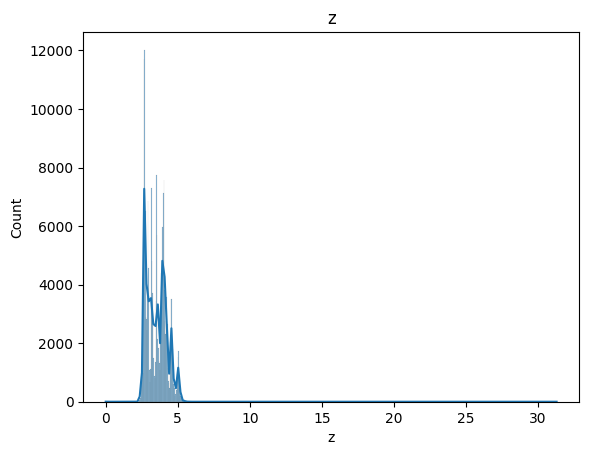

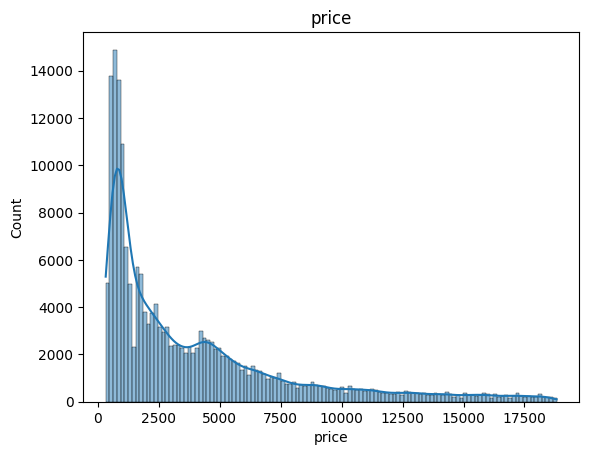

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.subplots_adjust(top=0.99,bottom=0.01,hspace=0.5,wspace=0.5)
x =1
for i in num_columns:
    sns.histplot(data=df,x=i,kde=True)
    plt.title(i)
    print('\n')
    plt.show()

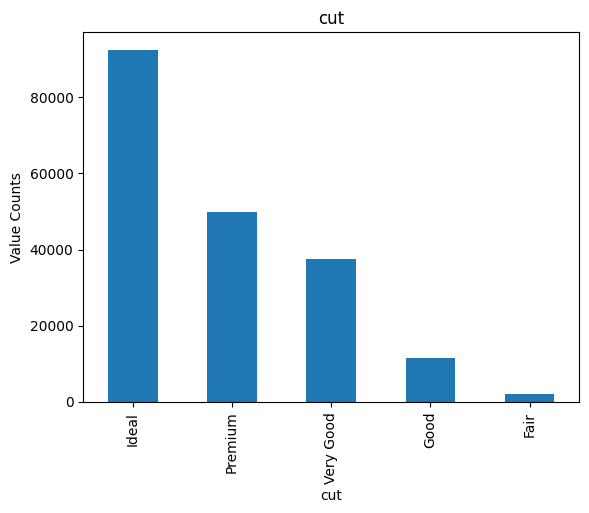

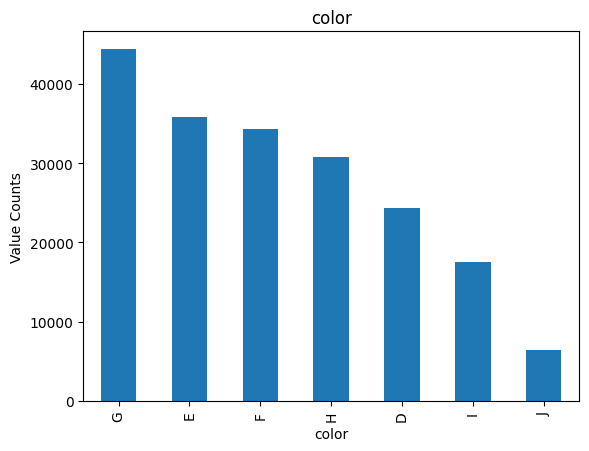

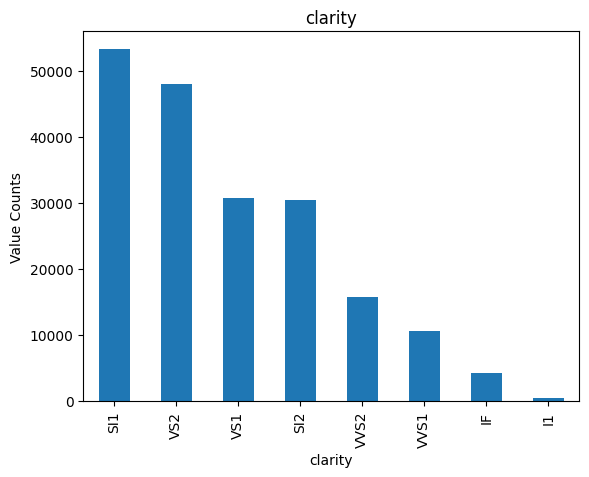

In [14]:
for i in cat_columns:
    df[i].value_counts().plot(kind='bar',xlabel=i,ylabel='Value Counts',title=i)
    print('\n')
    plt.show()

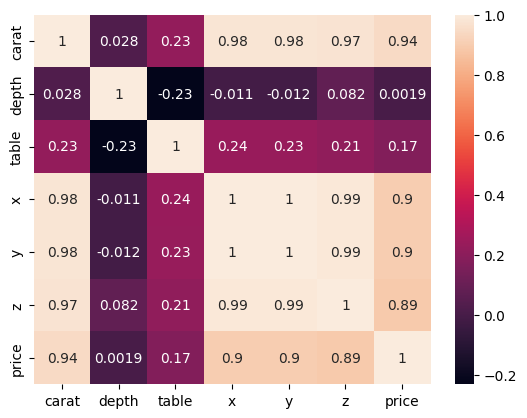

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

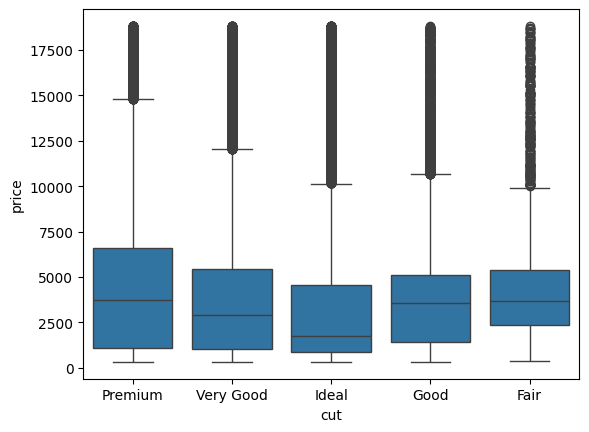

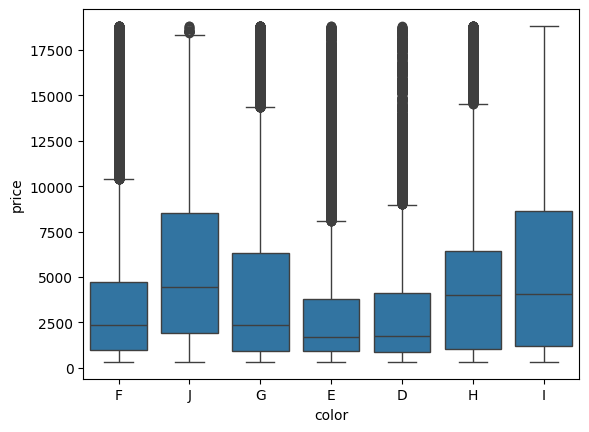

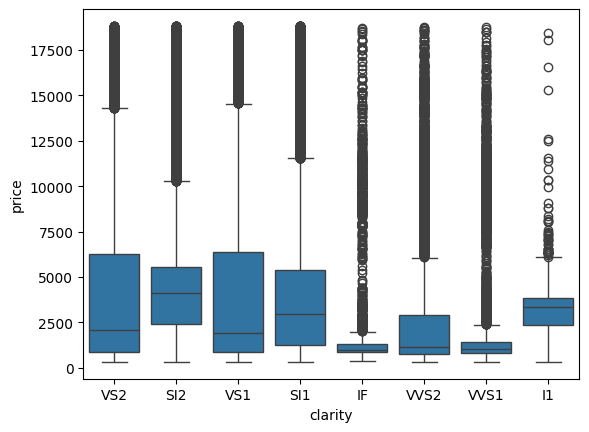

In [17]:
for i in cat_columns:
    sns.boxplot(data=df,x=i,y='price')
    print('\n')
    plt.show()

In [18]:
cut_mapper = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
clarity_mapper = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_mapper = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [19]:
df['cut'] = df['cut'].replace(cut_mapper)
df['clarity'] = df['clarity'].replace(clarity_mapper)
df['color'] = df['color'].replace(color_mapper)

/var/folders/dx/fvjxtgcj5w716vsn8jtd87g00000gn/T/ipykernel_55975/3611225572.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cut'] = df['cut'].replace(cut_mapper)
/var/folders/dx/fvjxtgcj5w716vsn8jtd87g00000gn/T/ipykernel_55975/3611225572.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['clarity'] = df['clarity'].replace(clarity_mapper)
/var/folders/dx/fvjxtgcj5w716vsn8jtd87g00000gn/T/ipykernel_55975/3611225572.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [22]:
X = df.drop(labels=['price'],axis=1)
Y = df['price']

In [23]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y,random_state=42)
mi_scores = pd.Series(mi_scores,name='MI Score',index=X.columns)

In [24]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

carat      1.825115
cut        0.092104
color      0.285518
clarity    0.397911
depth      0.045643
table      0.109664
x          1.674011
y          1.666632
z          1.615992
Name: MI Score, dtype: float64


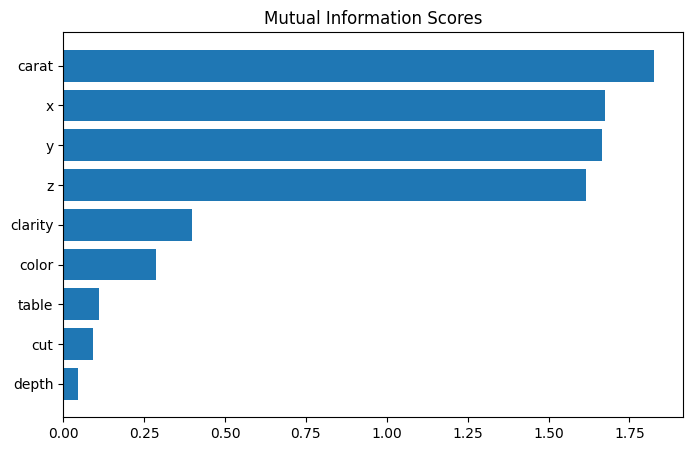

In [25]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)